In [1]:
import os
#for file in os.listdir("../kidney FPKM data/"):
#    if file.endswith(".txt"):
#        print(os.path.join("/mydir", file))


In [2]:
with os.scandir('../kidney FPKM data/00011154-9a17-45bf-8ffe-dd7c09adabda') as it:
    for entry in it:
        if entry.name.endswith('.gz'):
            # now can look inside the gzip files to grab data
            print(entry.name)

1a13663e-9015-4eeb-ab6a-8f40a8bbf403.FPKM.txt.gz


In [3]:
with os.scandir('../kidney FPKM data/') as it:
    for entry in it:
        if not entry.name.startswith('.') and not entry.is_file():
            # now can look inside the case directory to grab data
            with os.scandir('../kidney FPKM data/'+entry.name) as it:
                for entry in it:
                    if entry.name.endswith('.gz'):
                        # now can look inside the gzip files to grab data
                        #print(entry.name)

1a13663e-9015-4eeb-ab6a-8f40a8bbf403.FPKM.txt.gz
a4b9a319-8f66-494e-8ada-530a1e8145d7.FPKM.txt.gz
438e23c7-f71b-436b-8270-9cbfcf283925.FPKM.txt.gz
f9f3e08b-b3a2-4843-9e4a-9d115bce83c7.FPKM.txt.gz
fcd37843-e471-4fc3-a4fd-da8d161d36e4.FPKM.txt.gz
92de83d1-ba60-413c-8d21-d066505fe306.FPKM.txt.gz
a8165949-f924-4c32-8ccf-4109d2899e66.FPKM.txt.gz
bfd8c6e2-15cc-48ae-a4a3-722ab3527fb9.FPKM.txt.gz
5f32a811-87ba-4597-8794-8411bf2a4271.FPKM.txt.gz
956e52f2-475c-4aa3-9e99-0912e4612314.FPKM.txt.gz
432bfb40-6587-4393-89b8-456e639152e8.FPKM.txt.gz
225cc2de-40fd-4245-a96e-daa03931009d.FPKM.txt.gz
1b1ed2c4-0fc3-49d2-89c7-140083e330f5.FPKM.txt.gz
df573c90-44cf-4409-b92f-f6c8aaf01737.FPKM.txt.gz
72c70900-f879-4519-8bc4-23483122c2e5.FPKM.txt.gz
7a3c64e7-98bc-4cbf-8a2a-0c3314d46ad2.FPKM.txt.gz
f29a555a-3fb8-47a0-ac54-01811b6ad192.FPKM.txt.gz
705092ce-d8bb-417f-9164-c05c3987ffc2.FPKM.txt.gz
67de4131-2f71-415f-bac1-33bc14f6438e.FPKM.txt.gz
a73b7250-3437-4279-b3e1-1add31d7b3fc.FPKM.txt.gz
e7f07f98-8dbf-4884-8

18ea0e96-a76f-42ae-a340-019b24823d26.FPKM.txt.gz
bd595078-3d80-429a-8f18-d1f1981ba302.FPKM.txt.gz
8f8836f4-fb20-41df-a310-1d69a52c87c1.FPKM.txt.gz
89528cea-b21b-4ea8-a271-3d3f3ff142c9.FPKM.txt.gz
4e9f8a0e-5266-486d-91b3-a4701340b095.FPKM.txt.gz
9b984d8f-dacc-4fff-895a-586fea6543e8.FPKM.txt.gz
d8d4c3ae-74b5-4069-bac3-2722f224ffe8.FPKM.txt.gz
496f1859-bbe3-4d14-8c10-1bfa22f11ced.FPKM.txt.gz
47c200a9-4a86-452c-a6f8-12aa45d322a1.FPKM.txt.gz
adc36ba8-6fa9-47b0-8ab8-0dc047351970.FPKM.txt.gz
36510044-fbb9-40dc-bce9-edfb2673a648.FPKM.txt.gz
3a1ef3a4-f090-47dd-81ee-48469bc3f6ef.FPKM.txt.gz
b32f0495-0e52-4bed-b795-5f7270960561.FPKM.txt.gz
760a512d-b19e-4549-8a58-d4882215849f.FPKM.txt.gz
f1dcd148-bd99-4eba-a5a2-0e51e8b22414.FPKM.txt.gz
fb8f9097-1c0d-4b75-a7ac-3056c6f11d33.FPKM.txt.gz
4dbc0492-036f-470c-800d-03b82a81d10d.FPKM.txt.gz
3472dc3a-cd09-4d60-b5b3-6f4537e868ee.FPKM.txt.gz
28173f93-70cd-45b5-958e-5254bbc98089.FPKM.txt.gz
d18d519d-e89f-436e-b1e2-6c6597bb518f.FPKM.txt.gz
4730c90a-f900-4137-a

In [125]:
import json
from pprint import pprint

with open('../kidney clinical data/metadata.cart.2018-11-01.json') as data_file:    
    data = json.load(data_file)
#pprint(data)

In [41]:
data[0]['file_name']

'c08817f0-fc05-44ea-8a92-8b7538ac49d8.FPKM.txt.gz'

In [37]:
len(data)

1160

# Load Metadata
We need to use the metadata file to tie the FPKM data files to a specific case_id so that we can then grab the clinical data from that tsv file as well. This part goes through the metadata file adding the needed information to a list. The FPKM files have the following path: "kidney FPKM data/['file_id']/['file_name']"
So this first method stores a list of [case_id,file_id,file_name] which will allow us to pull the FPKM data for a specific case id.

In [126]:
import json
from pprint import pprint
import csv
import re
import gzip

In [172]:
#this cell opens the metadata file and create list with: files = [case_id,file_id,file_name]
with open('../kidney clinical data/metadata.cart.2018-11-01.json') as data_file:    
    data = json.load(data_file)

#initialize the array to hold the information
files = []
    
for n in range(len(data)):
    #remove the TARGET project files since clinical data doesn't match
    if not bool('TARGET' in data[n]['associated_entities'][0]['entity_submitter_id']):
        files.append([data[n]['associated_entities'][0]['case_id'],data[n]['file_id'],data[n]['file_name']])
    
pprint(files[0:3])

[['88c91a7b-5c41-4361-85d0-da759ab94204',
  'adadde58-de3b-4cf7-908b-5057831e400e',
  'c08817f0-fc05-44ea-8a92-8b7538ac49d8.FPKM.txt.gz'],
 ['74749fe8-f5d0-4d0d-8c7a-e56eba6503b3',
  'aa7770a2-6fbb-4693-8378-3b5de332deca',
  '3704029d-0bb1-40b5-b666-610174d521c2.FPKM.txt.gz'],
 ['88e7ce26-5b3f-4e4e-89b7-f706063fc467',
  '0e345952-6f09-4e61-b9a9-e8f809bf21e0',
  '6073b31e-7ce7-423e-a9b2-a85e3e9bc62e.FPKM.txt.gz']]


In [173]:
#grab FPKM data from files
C5AR1_FPKM_data=[['0',0.0]]*len(files)
ITGAM_FPKM_data=[['0',0.0]]*len(files)

for n in range(len(files)):
    with gzip.open('../kidney FPKM data/'+files[n][1]+'/'+files[n][2], 'rb') as f:
        for line in f:
            if bool('ENSG00000197405' in str(line)):
                string=str(line)
                C5AR1_FPKM_data[n]=[files[n][0],float(string[string.find('\\t')+2:string.find('\\n')])]
            if bool('ENSG00000169896' in str(line)):
                string=str(line)
                ITGAM_FPKM_data[n]=[files[n][0],float(string[string.find('\\t')+2:string.find('\\n')])]
                
print(C5AR1_FPKM_data[0:3])
print(ITGAM_FPKM_data[0:3])

[['88c91a7b-5c41-4361-85d0-da759ab94204', 2.32644413397], ['74749fe8-f5d0-4d0d-8c7a-e56eba6503b3', 10.5055625199], ['88e7ce26-5b3f-4e4e-89b7-f706063fc467', 6.50240338402]]
[['88c91a7b-5c41-4361-85d0-da759ab94204', 0.751129610554], ['74749fe8-f5d0-4d0d-8c7a-e56eba6503b3', 5.66743750699], ['88e7ce26-5b3f-4e4e-89b7-f706063fc467', 6.27944165834]]


In [174]:
clinical_data = []

with open('../kidney clinical data/clinical.tsv') as tsvin:
    tsvin = csv.reader(tsvin, delimiter='\t')
    
    firstline=True
    
    for row in tsvin:
        if firstline:
            firstline=False
        else:
        # the TARGET project stores data in the wrong columns so ignore those
            if not bool('TARGET' in str(row[1])):
                clinical_data.append([row[0],row[4],row[12],row[13],row[15],row[24]])

clinical_data[0:3]

[['1a726069-0b44-42ad-9a20-0ee90b31796b',
  '1954',
  '20708',
  'alive',
  '--',
  '930.0'],
 ['2797088e-f534-4c1e-abf8-cc6f832cd911',
  '1944',
  '24486',
  'alive',
  '--',
  '927.0'],
 ['18545977-f8a7-42a8-a15c-7a1fe72bd77f',
  '1929',
  '27409',
  'alive',
  '--',
  '586.0']]

# to do
So the information in files became the order of information in value (the FPKM data). What needs to happen next is to take the case_id from files[n][0] and find the matching row in clinical_data and use the year of birth and other information to calculate days/years since diagnosis to go along with that FPKM data and write that to a new list. I would export that data to a new tsv/csv to use later once you figure out what to do there. 

To calculate the days since diagnosis, you have to fudge a little since we only know year of birth. Calculate days to now based on year of birth (2018-(year of birth))*365 and then subtract age at diagnosis to get days from diagnosis to now if the patient is alive. If dead just read that column.

In [107]:
test=clinical_data

In [102]:
test1=test.sort()
print(test1)

None


In [108]:
test.sort()
pprint(test)

[['0022478c-4dfd-4cbe-a05e-fb20310844e3', '1953', '19677', 'dead', '563.0'],
 ['01277e9d-a35f-45d9-9e60-2e8cd79630a0', '1953', '20101', 'alive', '--'],
 ['0242658f-a698-4e68-b6e3-2f4aa076763e', '1937', '23966', 'alive', '--'],
 ['028d32fc-1b9f-49c6-9cb2-2d69671943cd', '1959', '16693', 'alive', '--'],
 ['02979422-5149-4750-ad5f-483e0bec6ac5', '1955', '17121', 'alive', '--'],
 ['02b5012e-f7ac-4423-8978-0b2f5e50926e', '1954', '18569', 'alive', '--'],
 ['02ec7a3a-2812-4a65-93cd-07bf655cc91b', '1936', '25229', 'alive', '--'],
 ['0300e3a3-c278-4c20-8739-6d8aa24588cb', '1959', '18841', 'alive', '--'],
 ['03301d0d-efee-4087-9fff-d1d4f53a924c', '1955', '19747', 'alive', '--'],
 ['037c691e-6320-451b-9276-78459f1b705c', '1933', '27253', 'dead', '344.0'],
 ['03905b58-4b13-410c-8e92-115ab2a42e80', '1953', '18132', 'dead', '1657.0'],
 ['03ae8fdb-8a9c-401d-b8e3-b5ea57bad182', '1951', '21852', 'alive', '--'],
 ['03b2ac94-05a3-49a7-b68f-51d045395b07', '1928', '28405', 'dead', '1317.0'],
 ['03f3dd32-e1d

 ['c793250d-1553-48e1-b6b2-aaffdfe5d39b', '1926', '29010', 'alive', '--'],
 ['c7e9ba09-0826-466c-8555-6595de31ed31', '1945', '21988', 'alive', '--'],
 ['c814c26c-ee8e-4fd8-a3d3-441b302ead3b', '1950', '19647', 'alive', '--'],
 ['c91a4cc3-aaa9-4bc9-b157-e46551d334c8', '1931', '27644', 'alive', '--'],
 ['ca245eb0-c60e-4a94-afd8-ccf15c1008df', '1954', '19986', 'alive', '--'],
 ['cba5705a-80dd-4496-9283-c5d3a92c7dba', '1968', '15063', 'alive', '--'],
 ['cc316faf-dcb1-4dea-b8b0-a17d000ff40f', '1952', '19692', 'alive', '--'],
 ['cc353686-e2b6-46a1-8095-48e2bc44b11f', '1949', '20950', 'alive', '--'],
 ['ccd44d97-f0d5-47cd-9c12-af458c750d23', '1931', '27612', 'alive', '--'],
 ['cd54aff9-bee4-41aa-b347-48f8684dcece', '1946', '24237', 'alive', '--'],
 ['cdd8eb5c-bda8-4961-9db4-72e0c4907e95', '1959', '17461', 'alive', '--'],
 ['cdfa3c5d-2fe8-4dfd-92c2-a54f39f55f18', '1950', '20410', 'dead', '1661.0'],
 ['ce0ab696-4e50-4b05-a7e5-5191c257bfbe', '1931', '27676', 'dead', '1097.0'],
 ['ce0f2e87-6c46-45

In [112]:
import time
from datetime import date

In [117]:
birth=date(int(clinical_data[0][1]), 6, 1)
difference=date.today()-birth
print(difference.days)

23899


In [ ]:
time

In [192]:
#duplicate scatter plot so x axis is FPKM and y axis is days to last follow up or days to death

#sort clinical_data
clinical_data.sort()
#sort FPKM data
C5AR1_FPKM_data.sort()
ITGAM_FPKM_data.sort()

plot_data_alive_C5AR1 = []
plot_data_dead_C5AR1 = []
plot_data_alive_ITGAM = []
plot_data_dead_ITGAM = []

for n in range(len(clinical_data)):
    for m in range(len(C5AR1_FPKM_data)):
        if clinical_data[n][0]==C5AR1_FPKM_data[m][0]:
            if 'alive' in clinical_data[n][3] and not clinical_data[n][5]=='--':
                plot_data_alive_C5AR1.append([float(clinical_data[n][5]),C5AR1_FPKM_data[m][1]])
                plot_data_alive_ITGAM.append([float(clinical_data[n][5]),ITGAM_FPKM_data[m][1]])
                print('alive')
                print(clinical_data[n][0],C5AR1_FPKM_data[m][0],clinical_data[n][5],C5AR1_FPKM_data[m][1])
                break
            if 'dead' in clinical_data[n][3] and not clinical_data[n][4]=='--':
                #use days_to_death value
                plot_data_dead_C5AR1.append([float(clinical_data[n][4]),C5AR1_FPKM_data[m][1]])
                plot_data_dead_ITGAM.append([float(clinical_data[n][4]),ITGAM_FPKM_data[m][1]])
                print('dead')
                print(clinical_data[n][0],C5AR1_FPKM_data[m][0],clinical_data[n][4],C5AR1_FPKM_data[m][1])
                break

dead
0022478c-4dfd-4cbe-a05e-fb20310844e3 0022478c-4dfd-4cbe-a05e-fb20310844e3 563.0 13.3310076319
alive
01277e9d-a35f-45d9-9e60-2e8cd79630a0 01277e9d-a35f-45d9-9e60-2e8cd79630a0 2470.0 2.05153224548
alive
0242658f-a698-4e68-b6e3-2f4aa076763e 0242658f-a698-4e68-b6e3-2f4aa076763e 3074.0 14.0990535989
alive
028d32fc-1b9f-49c6-9cb2-2d69671943cd 028d32fc-1b9f-49c6-9cb2-2d69671943cd 2257.0 6.86687422451
alive
02979422-5149-4750-ad5f-483e0bec6ac5 02979422-5149-4750-ad5f-483e0bec6ac5 4169.0 1.86272864363
alive
02b5012e-f7ac-4423-8978-0b2f5e50926e 02b5012e-f7ac-4423-8978-0b2f5e50926e 2372.0 2.03874943029
alive
02ec7a3a-2812-4a65-93cd-07bf655cc91b 02ec7a3a-2812-4a65-93cd-07bf655cc91b 2991.0 14.286567011
alive
0300e3a3-c278-4c20-8739-6d8aa24588cb 0300e3a3-c278-4c20-8739-6d8aa24588cb 1338.0 18.6697763849
alive
03301d0d-efee-4087-9fff-d1d4f53a924c 03301d0d-efee-4087-9fff-d1d4f53a924c 771.0 4.98940153384
dead
037c691e-6320-451b-9276-78459f1b705c 037c691e-6320-451b-9276-78459f1b705c 344.0 4.60215335

2953131e-9c34-4fa2-8af4-2c8d66ea2821 2953131e-9c34-4fa2-8af4-2c8d66ea2821 1018.0 10.5688787774
alive
2a05f855-83cc-4276-befd-5d6d4ec18f82 2a05f855-83cc-4276-befd-5d6d4ec18f82 3038.0 10.162487005
alive
2a2f168c-f93a-4e83-8df2-93a3e7bc06a0 2a2f168c-f93a-4e83-8df2-93a3e7bc06a0 563.0 6.16984155469
alive
2a9c4ce5-f5b3-4d3e-b6f5-07a9369096b8 2a9c4ce5-f5b3-4d3e-b6f5-07a9369096b8 1502.0 20.5463102978
alive
2b1dea0a-6d55-4fdd-9c1c-0d9fbe03bd78 2b1dea0a-6d55-4fdd-9c1c-0d9fbe03bd78 385.0 5.02340096282
alive
2b7c7e88-a204-44a4-ab28-624b586dc238 2b7c7e88-a204-44a4-ab28-624b586dc238 252.0 0.405196437588
alive
2bc5b2ec-aa8f-4889-9d92-d27f96c9fda1 2bc5b2ec-aa8f-4889-9d92-d27f96c9fda1 1621.0 12.0524861125
alive
2c084454-18e9-4837-9bba-7e91a73a48e0 2c084454-18e9-4837-9bba-7e91a73a48e0 32.0 15.0972556517
alive
2d0f6d4f-acb9-4b45-a69d-c9a3f68c3732 2d0f6d4f-acb9-4b45-a69d-c9a3f68c3732 2799.0 2.61940173427
alive
2d7e2ae4-09ba-40af-82ce-66ac7dbd4831 2d7e2ae4-09ba-40af-82ce-66ac7dbd4831 193.0 6.44545666526
de

74749fe8-f5d0-4d0d-8c7a-e56eba6503b3 74749fe8-f5d0-4d0d-8c7a-e56eba6503b3 561.0 2.02376501504
alive
74844571-c5a3-4a14-ac19-c7c1ce40259b 74844571-c5a3-4a14-ac19-c7c1ce40259b 2172.0 6.74807349794
dead
74fc9f65-b5f1-4b56-93a5-f90eaab52e31 74fc9f65-b5f1-4b56-93a5-f90eaab52e31 1045.0 11.6523887897
alive
75801b19-6569-4345-8134-82344a412c21 75801b19-6569-4345-8134-82344a412c21 1778.0 5.32323205697
dead
759238f2-0d37-404e-96f1-c26cae0ba2ea 759238f2-0d37-404e-96f1-c26cae0ba2ea 1121.0 4.9792950715
alive
75a53bff-bf0f-4ad8-9b8e-14a27914d4f2 75a53bff-bf0f-4ad8-9b8e-14a27914d4f2 1029.0 9.56273809475
alive
75e02a42-6937-4761-868b-c369c7bd3c72 75e02a42-6937-4761-868b-c369c7bd3c72 155.0 6.035991934
alive
75f5983b-553b-4a96-8625-867885e83db4 75f5983b-553b-4a96-8625-867885e83db4 510.0 11.4981573486
dead
7664c241-b369-4d76-9cd1-7f2bdc1d267f 7664c241-b369-4d76-9cd1-7f2bdc1d267f 1625.0 20.0691660905
alive
766999d7-fa28-415b-8783-be62b1b2fd70 766999d7-fa28-415b-8783-be62b1b2fd70 26.0 11.5309005413
dead
77

c793250d-1553-48e1-b6b2-aaffdfe5d39b c793250d-1553-48e1-b6b2-aaffdfe5d39b 1938.0 1.64723743649
alive
c7e9ba09-0826-466c-8555-6595de31ed31 c7e9ba09-0826-466c-8555-6595de31ed31 1559.0 10.8988978774
alive
c814c26c-ee8e-4fd8-a3d3-441b302ead3b c814c26c-ee8e-4fd8-a3d3-441b302ead3b 3841.0 2.81662565809
alive
c91a4cc3-aaa9-4bc9-b157-e46551d334c8 c91a4cc3-aaa9-4bc9-b157-e46551d334c8 2782.0 5.56217726121
alive
ca245eb0-c60e-4a94-afd8-ccf15c1008df ca245eb0-c60e-4a94-afd8-ccf15c1008df 2184.0 4.2814363984
alive
cba5705a-80dd-4496-9283-c5d3a92c7dba cba5705a-80dd-4496-9283-c5d3a92c7dba 511.0 9.26705549333
alive
cc316faf-dcb1-4dea-b8b0-a17d000ff40f cc316faf-dcb1-4dea-b8b0-a17d000ff40f 3179.0 1.35555988407
alive
cc353686-e2b6-46a1-8095-48e2bc44b11f cc353686-e2b6-46a1-8095-48e2bc44b11f 454.0 6.34515413113
alive
ccd44d97-f0d5-47cd-9c12-af458c750d23 ccd44d97-f0d5-47cd-9c12-af458c750d23 785.0 10.5111044393
alive
cd54aff9-bee4-41aa-b347-48f8684dcece cd54aff9-bee4-41aa-b347-48f8684dcece 805.0 6.1964498477
al

In [180]:
clinical_data[1][0]

'01277e9d-a35f-45d9-9e60-2e8cd79630a0'

In [190]:
sum(x.count(clinical_data[1][0]) for x in C5AR1_FPKM_data)

2

In [12]:
import matplotlib.pyplot as plt

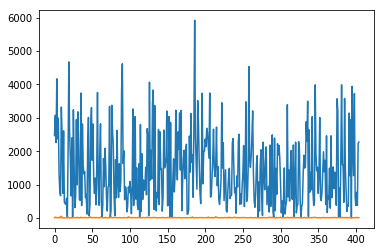

In [13]:
plt.plot(plot_data_alive_C5AR1)
plt.show()

In [178]:
plot_data_alive[2]

[5015, 14.0990535989]

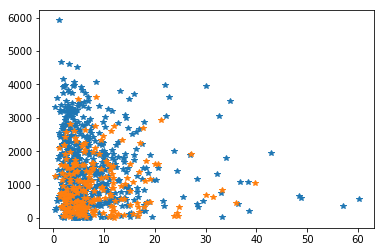

In [193]:
xalive=[]
yalive=[]

for n in range(len(plot_data_alive_C5AR1)):
    xalive.append(plot_data_alive_C5AR1[n][0])
    yalive.append(plot_data_alive_C5AR1[n][1])
    
xdead=[]
ydead=[]

for n in range(len(plot_data_dead_C5AR1)):
    xdead.append(plot_data_dead_C5AR1[n][0])
    ydead.append(plot_data_dead_C5AR1[n][1])
    
plt.plot(yalive,xalive,ydead,xdead,marker='*',linestyle='none')
plt.show()

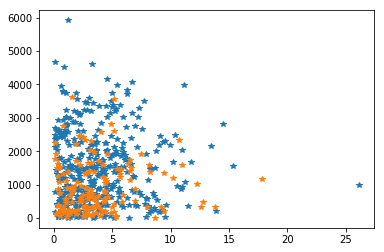

In [15]:
xalive=[]
yalive=[]

for n in range(len(plot_data_alive_ITGAM)):
    xalive.append(plot_data_alive_ITGAM[n][0])
    yalive.append(plot_data_alive_ITGAM[n][1])
    
xdead=[]
ydead=[]

for n in range(len(plot_data_dead_ITGAM)):
    xdead.append(plot_data_dead_ITGAM[n][0])
    ydead.append(plot_data_dead_ITGAM[n][1])
    
plt.plot(yalive,xalive,ydead,xdead,marker='*',linestyle='none')
plt.show()

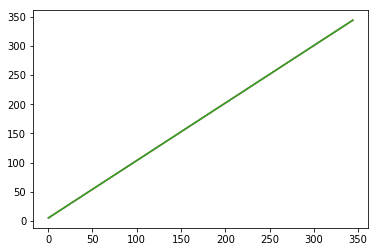

In [21]:
plt.plot(plot_data_dead_ITGAM[:][1],plot_data_dead_C5AR1[:][1])
plt.show()

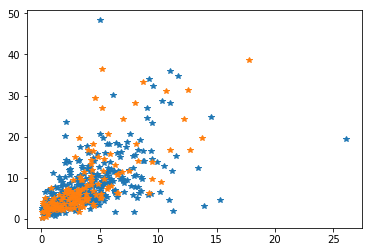

In [26]:
#check for correlations with C5AR1 and ITGAM
xalive=[]
yalive=[]

for n in range(len(plot_data_alive_ITGAM)):
    xalive.append(plot_data_alive_C5AR1[n][1])
    yalive.append(plot_data_alive_ITGAM[n][1])
    
xdead=[]
ydead=[]

for n in range(len(plot_data_dead_ITGAM)):
    xdead.append(plot_data_dead_C5AR1[n][1])
    ydead.append(plot_data_dead_ITGAM[n][1])
    
plt.plot(yalive,xalive,ydead,xdead,marker='*',linestyle='none')
plt.show()

In [32]:
print(sum(xalive)/len(xalive))
print(sum(xdead)/len(xdead))
print(sum(yalive)/len(yalive))
print(sum(ydead)/len(ydead))

7.555547414118275
8.244488311286027
3.7374627050368026
3.7427167847487395


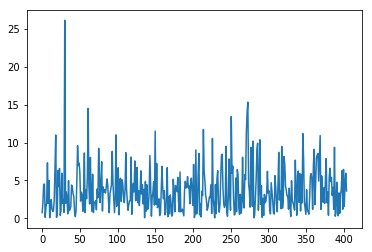

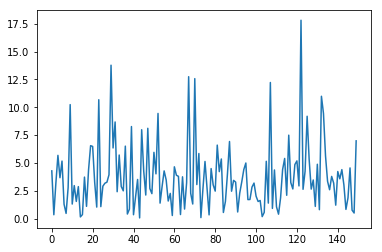

In [36]:
plt.plot(yalive)
plt.show()
plt.plot(ydead)
plt.show()

In [37]:
import numpy as np

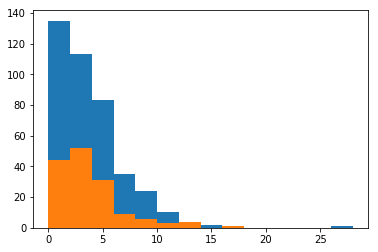

In [53]:
plt.hist(yalive,bins=np.arange(0,30,2))
plt.hist(ydead,bins=np.arange(0,30,2))
plt.show()

# Make the survival probability plots
These plots show how many patients are still alive vs time. They use a cut on the FPKM data to create two populations a "low" and a "high" population that you can compare survivability with. The cut value is then optimized to find the clearest distinction between the two populations. 

For now I just have code to do a manual cut. The feature to calculate the optimum cut will come later.

input data:
plot_data_alive_C5AR1 = [# days at last check, FPKM of C5AR1]
plot_data_dead_C5AR1 = [# days at death, FPKM of C5AR1]
plot_data_alive_ITGAM = [# days at last check, FPKM of ITGAM]
plot_data_dead_ITGAM = [# days at death, FPKM of ITGAM]

In [55]:
plot_data_alive_C5AR1[0:2]

[[2470.0, 2.05153224548], [3074.0, 23.5261925005]]

In [194]:
c5ar1_dead_sort = sorted(plot_data_dead_C5AR1)

In [195]:
c5ar1_dead_sort[0:3]

[[2.0, 11.8548769053], [18.0, 6.38823115719], [41.0, 3.2426004976]]

In [196]:
plot_data_dead_C5AR1[0:5]

[[563.0, 13.3310076319],
 [344.0, 4.60215335627],
 [1657.0, 7.71481224987],
 [1317.0, 11.5068071573],
 [320.0, 5.10374272546]]

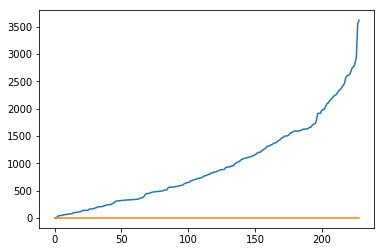

In [197]:
total_patients=len(plot_data_alive_C5AR1)+len(plot_data_dead_C5AR1)
survive_C5AR1=np.zeros((len(plot_data_dead_C5AR1)+1,2))
survive_C5AR1[0]=[0,1.0]
for n in range(len(plot_data_dead_C5AR1)):
    survive_C5AR1[n+1]=[c5ar1_dead_sort[n][0],(total_patients-(n+1))/total_patients]
    
plt.plot(survive_C5AR1)
plt.show()

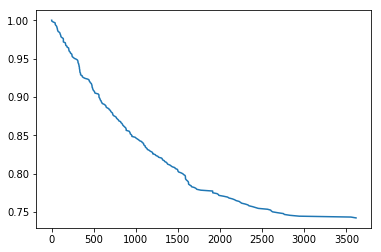

In [198]:
plt.plot(survive_C5AR1[:,0],survive_C5AR1[:,1])
plt.show()

In [199]:
survive_C5AR1[0:3,1]

array([ 1.        ,  0.99887006,  0.99774011])

In [200]:
from operator import itemgetter
C5AR1_sorted_FPKM = plot_data_alive_C5AR1[0:406]+plot_data_dead_C5AR1[0:150]
C5AR1_sorted_FPKM = sorted(C5AR1_sorted_FPKM,key=itemgetter(1))

print(C5AR1_sorted_FPKM[0:3])

[[1262.0, 0.235971172216], [3322.0, 0.260594463619], [252.0, 0.405196437588]]


In [201]:
# sort into two populations based on FPKM
sort_value_C5AR1 = 4.36
sort_value_ITGAM = 3.74
low_alive_C5AR1 = []
low_dead_C5AR1 = []
low_alive_ITGAM = []
low_dead_ITGAM = []
high_alive_C5AR1 = []
high_dead_C5AR1 = []
high_alive_ITGAM = []
high_dead_ITGAM = []

for n in range(len(plot_data_alive_C5AR1)):
    if plot_data_alive_C5AR1[n][1]<sort_value_C5AR1:
        low_alive_C5AR1.append(plot_data_alive_C5AR1[n])
    else:
        high_alive_C5AR1.append(plot_data_alive_C5AR1[n])
        
for n in range(len(plot_data_dead_C5AR1)):
    if plot_data_dead_C5AR1[n][1]<sort_value_C5AR1:
        low_dead_C5AR1.append(plot_data_dead_C5AR1[n])
    else:
        high_dead_C5AR1.append(plot_data_dead_C5AR1[n])
        
for n in range(len(plot_data_alive_ITGAM)):
    if plot_data_alive_ITGAM[n][1]<sort_value_ITGAM:
        low_alive_ITGAM.append(plot_data_alive_ITGAM[n])
    else:
        high_alive_ITGAM.append(plot_data_alive_ITGAM[n])
        
for n in range(len(plot_data_dead_ITGAM)):
    if plot_data_dead_ITGAM[n][1]<sort_value_ITGAM:
        low_dead_ITGAM.append(plot_data_dead_ITGAM[n])
    else:
        high_dead_ITGAM.append(plot_data_dead_ITGAM[n])

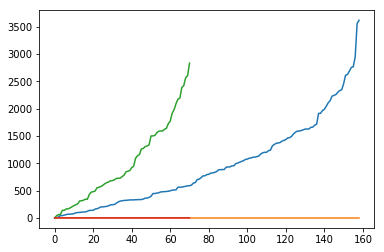

In [202]:
total_patients_high=len(high_alive_C5AR1)+len(high_dead_C5AR1)
high_survive_C5AR1=np.zeros((len(high_dead_C5AR1)+1,2))
high_survive_C5AR1[0]=[0,1.0]
total_patients_low=len(low_alive_C5AR1)+len(low_dead_C5AR1)
low_survive_C5AR1=np.zeros((len(low_dead_C5AR1)+1,2))
low_survive_C5AR1[0]=[0,1.0]

#sort dead data
high_dead_C5AR1.sort()
low_dead_C5AR1.sort()

for n in range(len(high_dead_C5AR1)):
    high_survive_C5AR1[n+1]=[high_dead_C5AR1[n][0],(total_patients_high-(n+1))/total_patients_high]
    
for n in range(len(low_dead_C5AR1)):
    low_survive_C5AR1[n+1]=[low_dead_C5AR1[n][0],(total_patients_low-(n+1))/total_patients_low]
    
plt.plot(high_survive_C5AR1)
plt.plot(low_survive_C5AR1)
plt.show()

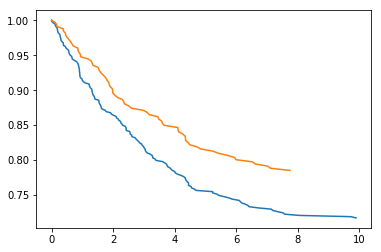

In [203]:
plt.plot(high_survive_C5AR1[:,0]/365,high_survive_C5AR1[:,1],low_survive_C5AR1[:,0]/365,low_survive_C5AR1[:,1])
plt.show()

In [204]:
print(len(low_alive_C5AR1)+len(low_dead_C5AR1))
print(len(high_alive_C5AR1)+len(high_dead_C5AR1))

326
559


In [167]:
sorted(plot_data_alive_C5AR1)

[[0.0, 6.36957411712],
 [0.0, 7.64493916696],
 [0.0, 8.9696179099],
 [0.0, 39.7446138869],
 [3.0, 2.9145264529],
 [3.0, 6.37050629448],
 [3.0, 18.4856929122],
 [4.0, 3.23132009077],
 [5.0, 2.54196703113],
 [7.0, 7.67070125689],
 [7.0, 14.8495253555],
 [11.0, 7.53506686102],
 [13.0, 3.18331843041],
 [13.0, 23.2226695406],
 [14.0, 6.14160447365],
 [16.0, 1.60203200093],
 [16.0, 4.77177984123],
 [16.0, 5.22603768233],
 [18.0, 6.48969761847],
 [23.0, 3.74288436083],
 [26.0, 2.51422978858],
 [26.0, 2.9844295956],
 [27.0, 11.0686111381],
 [29.0, 2.27893608394],
 [29.0, 8.15347430021],
 [30.0, 4.59360442378],
 [32.0, 5.7947691091],
 [35.0, 48.7296157064],
 [36.0, 2.78614913591],
 [36.0, 10.5395726701],
 [43.0, 9.25523835409],
 [53.0, 10.5175835649],
 [61.0, 15.6911394726],
 [62.0, 11.1423680878],
 [67.0, 12.0524861125],
 [73.0, 2.14786176096],
 [76.0, 5.10400761699],
 [84.0, 1.7177018068],
 [92.0, 36.7745454036],
 [108.0, 4.09210535739],
 [112.0, 0.998608517639],
 [112.0, 6.79758864098],
 [11

In [168]:
sorted(plot_data_dead_C5AR1)

[[2.0, 33.2748809766],
 [18.0, 3.11271301773],
 [41.0, 5.5351703226],
 [42.0, 9.64511786971],
 [43.0, 3.63407407636],
 [51.0, 3.97542988708],
 [59.0, 11.6523887897],
 [62.0, 8.06086029584],
 [65.0, 8.19472140043],
 [68.0, 4.43119499871],
 [69.0, 1.94441011115],
 [73.0, 2.01480620267],
 [77.0, 6.46000936603],
 [93.0, 2.86384971439],
 [99.0, 4.4769279027],
 [101.0, 4.77378039718],
 [106.0, 3.65711914666],
 [109.0, 2.26770192218],
 [110.0, 2.13473804325],
 [122.0, 6.21270282566],
 [137.0, 14.9390298426],
 [139.0, 2.85232659359],
 [139.0, 3.00137026476],
 [139.0, 3.54022700533],
 [139.0, 14.0467018201],
 [162.0, 2.61940173427],
 [164.0, 2.77624543969],
 [166.0, 0.405196437588],
 [168.0, 14.434788153],
 [182.0, 6.06083458654],
 [183.0, 5.15827547348],
 [201.0, 4.01604841027],
 [202.0, 13.7841469849],
 [204.0, 6.71407823316],
 [206.0, 4.59040144128],
 [211.0, 6.05445535127],
 [222.0, 4.78524263061],
 [224.0, 3.6661006962],
 [238.0, 5.32715579494],
 [241.0, 2.68494785614],
 [242.0, 5.03339912

In [165]:
plot_data_alive_C5AR1.count(1186.0)

0